In [ ]:
import tensorflow.keras as tfk
tfkl=tfk.layers
from tensorflow.keras.models import Model
import numpy as np
import matplotlib as plt
%matplotlib inline

In [ ]:
num_base_filters=32
l2_reg=1e-4  #1e-4
dropout_rate=0.20  #0.15 for case3  ## for MC-Dropout
learning_rate=1e-4
bs=64

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
inputs=tfkl.Input((224,224,3))
#Block1
x=tfkl.Conv2D(filters=num_base_filters,kernel_size=3,strides=(1, 1),padding="same",kernel_regularizer=tfk.regularizers.l2(l2_reg))(inputs)
x=tfkl.LeakyReLU()(x)
x=tfkl.Dropout(dropout_rate)(x,training=True)
x=tfkl.BatchNormalization()(x)
x=tfkl.Conv2D(filters=num_base_filters,kernel_size=3,strides=(1, 1),padding="same",kernel_regularizer=tfk.regularizers.l2(l2_reg))(x)
x=tfkl.LeakyReLU()(x)
x=tfkl.Dropout(dropout_rate)(x,training=True)
x=tfkl.BatchNormalization()(x)
x=tfkl.MaxPooling2D(pool_size=3, strides=(2, 2), padding="same")(x)
#Block2
x=tfkl.Conv2D(filters=num_base_filters*2,kernel_size=3,strides=(1, 1),padding="same",kernel_regularizer=tfk.regularizers.l2(l2_reg))(x)
x=tfkl.LeakyReLU()(x)
x=tfkl.Dropout(dropout_rate)(x,training=True)
x=tfkl.BatchNormalization()(x)
x=tfkl.Conv2D(filters=num_base_filters*2,kernel_size=3,strides=(1, 1),padding="same",kernel_regularizer=tfk.regularizers.l2(l2_reg))(x)
x=tfkl.LeakyReLU()(x)
x=tfkl.Dropout(dropout_rate)(x,training=True)
x=tfkl.BatchNormalization()(x)
x=tfkl.MaxPooling2D(pool_size=3, strides=(2, 2), padding="same")(x)
#Block3
x=tfkl.Conv2D(filters=num_base_filters*4,kernel_size=3,strides=(1, 1),padding="same",kernel_regularizer=tfk.regularizers.l2(l2_reg))(x)
x=tfkl.LeakyReLU()(x)
x=tfkl.Dropout(dropout_rate)(x,training=True)
x=tfkl.BatchNormalization()(x)
x=tfkl.Conv2D(filters=num_base_filters*4,kernel_size=3,strides=(1, 1),padding="same",kernel_regularizer=tfk.regularizers.l2(l2_reg))(x)
x=tfkl.LeakyReLU()(x)
x=tfkl.Dropout(dropout_rate)(x,training=True)
x=tfkl.BatchNormalization()(x)
x=tfkl.MaxPooling2D(pool_size=3, strides=(2, 2), padding="same")(x)
# Block 4
x=tfkl.Conv2D(filters=num_base_filters*8,kernel_size=3,strides=(1, 1),padding="same",kernel_regularizer=tfk.regularizers.l2(l2_reg))(x)
x=tfkl.LeakyReLU()(x)
x=tfkl.Dropout(dropout_rate)(x,training=True)
x=tfkl.BatchNormalization()(x)
x=tfkl.Conv2D(filters=num_base_filters*8,kernel_size=3,strides=(1, 1),padding="same",kernel_regularizer=tfk.regularizers.l2(l2_reg))(x)
x=tfkl.LeakyReLU()(x)
x=tfkl.Dropout(dropout_rate)(x,training=True)
x=tfkl.BatchNormalization()(x)
x=tfkl.Conv2D(filters=num_base_filters*8,kernel_size=3,strides=(1, 1),padding="same",kernel_regularizer=tfk.regularizers.l2(l2_reg))(x)
x=tfkl.LeakyReLU()(x)
x=tfkl.Dropout(dropout_rate)(x,training=True)
x=tfkl.BatchNormalization()(x)
x=tfkl.MaxPooling2D(pool_size=5, strides=(3, 3), padding="same")(x)
# Block 5
x=tfkl.Conv2D(filters=num_base_filters*8,kernel_size=3,strides=(1, 1),padding="same",kernel_regularizer=tfk.regularizers.l2(l2_reg))(x)
x=tfkl.LeakyReLU()(x)
x=tfkl.Dropout(dropout_rate)(x,training=True)
x=tfkl.BatchNormalization()(x)
x=tfkl.Conv2D(filters=num_base_filters*8,kernel_size=3,strides=(1, 1),padding="same",kernel_regularizer=tfk.regularizers.l2(l2_reg))(x)
x=tfkl.LeakyReLU()(x)
x=tfkl.Dropout(dropout_rate)(x,training=True)
x=tfkl.BatchNormalization()(x)
x=tfkl.Conv2D(filters=num_base_filters*8,kernel_size=3,strides=(1, 1),padding="same",kernel_regularizer=tfk.regularizers.l2(l2_reg))(x)
x=tfkl.LeakyReLU()(x)
x=tfkl.Dropout(dropout_rate)(x,training=True)
x=tfkl.BatchNormalization()(x)
x=tfkl.MaxPooling2D(pool_size=5, strides=(3, 3), padding="same")(x)
#x=tfkl.Lambda(lambda y: tfk.backend.concatenate([tfkl.GlobalAvgPool2D()(y),tfkl.GlobalMaxPool2D()(y)], axis=1))(x)
x=tfkl.Flatten()(x)
# Fully-connected
x=tfkl.Dense(2048)(x)
x=tfkl.LeakyReLU()(x)
x=tfkl.Dropout(0.5)(x,training=True)
x=tfkl.BatchNormalization()(x)
x=tfkl.Dense(512)(x)
x=tfkl.LeakyReLU()(x)
x=tfkl.Dropout(0.5)(x,training=True)
x=tfkl.BatchNormalization()(x)
x=tfkl.Dense(128)(x)
x=tfkl.LeakyReLU()(x)
x=tfkl.Dropout(0.2)(x,training=True)
x=tfkl.BatchNormalization()(x)
outputs=tfkl.Dense(5,activation='softmax')(x)
model=Model(inputs, outputs)

In [ ]:
model.load_weights('/content/drive/My Drive/best_model_multi_class_ce.h5')

In [ ]:
for layer in model.layers:
  if "dropout" in layer.name:
    layer.trainable=True
  else:
    layer.trainable=False

In [ ]:
for layer in model.layers:
  print(layer.name, layer.trainable)

input_1 False
conv2d False
leaky_re_lu False
dropout True
batch_normalization False
conv2d_1 False
leaky_re_lu_1 False
dropout_1 True
batch_normalization_1 False
max_pooling2d False
conv2d_2 False
leaky_re_lu_2 False
dropout_2 True
batch_normalization_2 False
conv2d_3 False
leaky_re_lu_3 False
dropout_3 True
batch_normalization_3 False
max_pooling2d_1 False
conv2d_4 False
leaky_re_lu_4 False
dropout_4 True
batch_normalization_4 False
conv2d_5 False
leaky_re_lu_5 False
dropout_5 True
batch_normalization_5 False
max_pooling2d_2 False
conv2d_6 False
leaky_re_lu_6 False
dropout_6 True
batch_normalization_6 False
conv2d_7 False
leaky_re_lu_7 False
dropout_7 True
batch_normalization_7 False
conv2d_8 False
leaky_re_lu_8 False
dropout_8 True
batch_normalization_8 False
max_pooling2d_3 False
conv2d_9 False
leaky_re_lu_9 False
dropout_9 True
batch_normalization_9 False
conv2d_10 False
leaky_re_lu_10 False
dropout_10 True
batch_normalization_10 False
conv2d_11 False
leaky_re_lu_11 False
dropout_1

In [ ]:
import glob
import cv2
import numpy as np
Y_prob=[]
Y_true=[]
filec0=[]
filec1=[]
filec2=[]
filec3=[]
def UQ(files,label,model,num_samples,T):
  i=0
  countp0=countp1=countn0=countn1=0
  count=0;
  for file in files:
    x=cv2.imread(file)
    x=cv2.resize(x,(224,224))
    x=cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
    x= x/255.0
    x=np.expand_dims(x,axis=0)
    #print(x.shape)
    mc_samples=np.array([model(x,training=True) for _ in range(num_samples)])
    #print(mc_samples.shape)
    mc_samples=np.squeeze(mc_samples,axis=1)
    #print(mc_samples.shape)
    #print(mc_samples)
    mean_mc_samples=np.mean(mc_samples,axis=0)
    Y_prob.append(mc_samples)
    Y_true.append(label)
    #print(mean_mc_samples)
    y_pred=np.argmax(mean_mc_samples)
    #print(y_pred)
    ent=-1*np.sum(np.multiply(mean_mc_samples,np.log2(mean_mc_samples)),axis=0)
    count+=1
   # print(ent)
    if y_pred==label and ent <=T:
      #print("Correctly Classified with Low Uncertainty")
      countp0+=1
      filec0.append(file)
    elif y_pred==label and ent>T:
      #print("Correctly Classified with High Uncertainty")
      countp1+=1
      filec1.append(file)
    elif y_pred!=label and ent <=T:
      #print("Wrongly Classified with Low Uncertainty")
      countn0+=1
      filec2.append(file)
    elif y_pred!=label and ent>T:
      #print("Wrongly Classified with High Uncertainty")
      countn1+=1
      filec3.append(file)
    i=i+1
  return countp0,countp1,countn0,countn1

In [ ]:
temp=np.array([0.2,0.2,0.2,0.2,0.2])
ent=-1*np.sum(np.multiply(temp,np.log2(temp)),axis=0)
print(ent)

2.321928094887362


In [ ]:
import glob
a=b=c=d=0
file0=glob.glob("/content/drive/My Drive/Multiclass Dataset New/test/0/*")
countp0,countp1,countn0,countn1=UQ(file0,0,model,10,1.276)
print("Class 0")
a=a+countp0
b=b+countp1
c=c+countn0
d=d+countn1
print("Class 0")
print("Correctly Classified with Low Uncertainty",countp0)
print("Correctly Classified with High Uncertainty",countp1)
print("Wrongly Classified with Low Uncertainty",countn0)
print("Wrongly Classified with High Uncertainty",countn1)
file1=glob.glob("/content/drive/My Drive/Multiclass Dataset New/test/1/*")
countp0,countp1,countn0,countn1=UQ(file1,1,model,10,1.276)
# print("Done")
a=a+countp0
b=b+countp1
c=c+countn0
d=d+countn1
print("Class 1")
print("Correctly Classified with Low Uncertainty",countp0)
print("Correctly Classified with High Uncertainty",countp1)
print("Wrongly Classified with Low Uncertainty",countn0)
print("Wrongly Classified with High Uncertainty",countn1)
file2=glob.glob("/content/drive/My Drive/Multiclass Dataset New/test/2/*")
countp0,countp1,countn0,countn1=UQ(file2,2,model,10,1.276)
print("Done")
a=a+countp0
b=b+countp1
c=c+countn0
d=d+countn1
print("Class 2")
print("Correctly Classified with Low Uncertainty",countp0)
print("Correctly Classified with High Uncertainty",countp1)
print("Wrongly Classified with Low Uncertainty",countn0)
print("Wrongly Classified with High Uncertainty",countn1)
file3=glob.glob("/content/drive/My Drive/Multiclass Dataset New/test/3/*")
countp0,countp1,countn0,countn1=UQ(file3,3,model,10,1.276)
#print("Done")
print("Class 3")
print("Correctly Classified with Low Uncertainty",countp0)
print("Correctly Classified with High Uncertainty",countp1)
print("Wrongly Classified with Low Uncertainty",countn0)
print("Wrongly Classified with High Uncertainty",countn1)
a=a+countp0
b=b+countp1
c=c+countn0
d=d+countn1
file4=glob.glob("/content/drive/My Drive/Multiclass Dataset New/test/4/*")
countp0,countp1,countn0,countn1=UQ(file4,4,model,10,1.276)
#print("Done")
print("Class 4")
print("Correctly Classified with Low Uncertainty",countp0)
print("Correctly Classified with High Uncertainty",countp1)
print("Wrongly Classified with Low Uncertainty",countn0)
print("Wrongly Classified with High Uncertainty",countn1)
a=a+countp0
b=b+countp1
c=c+countn0
d=d+countn1

print("Total")
print("Correctly Classified with Low Uncertainty",a)
print("Correctly Classified with High Uncertainty",b)
print("Wrongly Classified with Low Uncertainty",c)
print("Wrongly Classified with High Uncertainty",d)

Class 0
Class 0
Correctly Classified with Low Uncertainty 797
Correctly Classified with High Uncertainty 3
Wrongly Classified with Low Uncertainty 11
Wrongly Classified with High Uncertainty 2
Class 1
Correctly Classified with Low Uncertainty 297
Correctly Classified with High Uncertainty 9
Wrongly Classified with Low Uncertainty 21
Wrongly Classified with High Uncertainty 6
Done
Class 2
Correctly Classified with Low Uncertainty 390
Correctly Classified with High Uncertainty 9
Wrongly Classified with Low Uncertainty 39
Wrongly Classified with High Uncertainty 13
Class 3
Correctly Classified with Low Uncertainty 131
Correctly Classified with High Uncertainty 4
Wrongly Classified with Low Uncertainty 11
Wrongly Classified with High Uncertainty 0
Class 4
Correctly Classified with Low Uncertainty 137
Correctly Classified with High Uncertainty 4
Wrongly Classified with Low Uncertainty 29
Wrongly Classified with High Uncertainty 7
Total
Correctly Classified with Low Uncertainty 1752
Correctl

In [ ]:
import random
random.shuffle(filec0)
random.shuffle(filec1)
random.shuffle(filec2)
random.shuffle(filec3)

In [ ]:
filess=[filec0,filec1,filec2,filec3]
to_check='4189d4e631ec.png'
for i in range(0,len(filess)):
  for j in range(0,len(filess[i])):
    temp=filess[i][j].split("/")
    temp=temp[len(temp)-1]
    if temp==to_check:
      print(i)

2


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


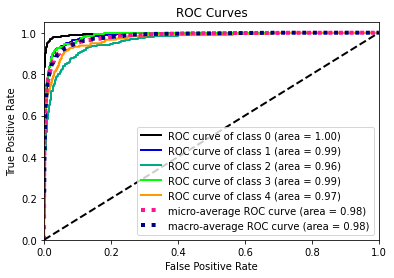

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt
fig1=skplt.metrics.plot_roc_curve(Y_true, Y_prob)
plt.savefig("Roc_MC.png",dpi=100)
plt.show()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
path_test='/content/drive/My Drive/Multiclass Dataset New/test'
test_datagen = ImageDataGenerator(rescale=1/255.0)
test_generator = test_datagen.flow_from_directory(
        path_test,
        target_size=(224, 224),
        batch_size=64,
        class_mode='categorical',
        shuffle=False)

In [ ]:
num_of_test_samples=1920
batch_size=1

In [ ]:
Y_pred = model.predict(test_generator, num_of_test_samples // batch_size+1)
print(Y_pred.shape)
y_pred = np.argmax(Y_pred, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))

In [ ]:
from sklearn.metrics import classification_report
print('Classification Report')
target_names = ['0', '1','2','3','4']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

In [ ]:
print(countp0)
print(countp1)
print(countn0)
print(countn1)

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


np.set_printoptions(precision=5)

plt.figure()
classes=["No DR","Mild DR","Moderate DR","Severe DR","Proliferative DR",]
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=False,
                      title='')
plt.tight_layout()
plt.savefig('final_conf_mat_mc_mcdp.png',dpi=1000)
plt.show()

In [ ]:
cnf_matrix=np.array([[795,9,7,0,2],
    [13,298,17,3,2],
    [3,16,399,17,16],
    [0,0,0,130,7],
    [1,2,27,11,136]])